## Notebook 9.2 (KNN)

There are many types of classifiers in machine learning. These are algorithms that aim to assign samples to a labeled category based on features of the sample. It is a type of clustering algorithm. One of the simplest forms is called k-Nearest Neighbors. This is a supervised learning algorithm that assigns samples to a category based on the label of the point in the trained data set that is closest to it (or the k-nearest points that are closest to it). 

In [1]:
import numpy as np
import pandas as pd
import toyplot
toyplot.config.autoformat = "png"

### Simulated data
Although we could use an existing data set, such as the Iris data set for testing out this method, I again prefer to simulate our own data using numpy random. This exercise is good practice for using numpy, and it ensures that you know what the data look like and how they were generated. Let's try to generate data in two clouds of points drawn from different means but with some overlapping points. Points drawn from different means will be labeled by the distribution they were drawn from, and our goal is to label the points as to which distribution they belong to. 

In [2]:
# how many points in each cloud
nsize = 1000

# 2-d cloud of points with mean at [1, 1] and std [1, 1]
np.random.seed(123)
cloud1 = np.random.normal([1, 1], [0.5, 1], (nsize, 2))
cloud2 = np.random.normal([2, 2], [1, 0.5], (nsize, 2))

In [3]:
# concatenate all of the points
data = pd.DataFrame({
    'x': np.concatenate([cloud1[:, 0], cloud2[:, 0]]),
    'y': np.concatenate([cloud1[:, 1], cloud2[:, 1]]),
    'label': np.concatenate([np.repeat(0, nsize), np.repeat(1, nsize)]),
})

# shuffle order of rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,label,x,y
0,0,0.560232,1.283627
1,0,1.179844,0.635643
2,1,2.181113,2.433217
3,0,1.266755,0.584381
4,1,2.144146,1.953467


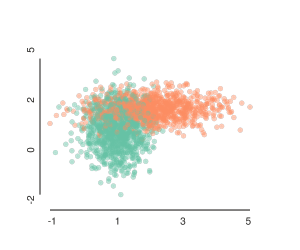

In [4]:
toyplot.scatterplot(
    data.x, 
    data.y, 
    opacity=0.5,
    color=[toyplot.color.Palette()[i] for i in data.label], 
    width=300, 
    height=250);

### Fit the data using a KNN

In [5]:
# separate data into training and test and format for sklearn
X = data[['x', 'y']].values
y = data.label.values

# test vs train
ntest = 200
Xtest = X[:ntest]
Xtrain = X[ntest:]
ytest = y[:ntest]
ytrain = y[ntest:]

In [6]:
# 1. choose a model
from sklearn.neighbors import KNeighborsClassifier


In [7]:
# 2. initialize and choose hyperparameters
knn = KNeighborsClassifier(n_neighbors=1)


In [8]:
# 3. fit the model
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [9]:
# 4. predict 
yfit = knn.predict(Xtest)

### Validation

How well did the yfit values match ytest? Does it fit better if we use a different hyperparameter?

In [28]:
# 78% of points were assigned correctly... not too bad
np.mean(yfit == ytest)

0.78000000000000003

In [29]:
# draw uniform points from min to max in 2 dimensions
newdata = np.random.uniform(-2, 6, (nsize, 2))

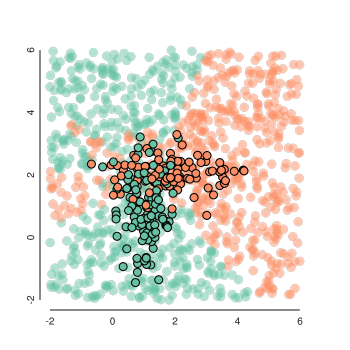

In [30]:
# plot predictions as background color
c, a, m = toyplot.scatterplot(
    newdata[:, 0],
    newdata[:, 1],
    color=[toyplot.color.Palette()[i] for i in knn.predict(newdata)],
    size=8, 
    opacity=0.5,
    width=350, 
    height=350,
);

# plot test data (not used in training) and show prediction
a.scatterplot(
    Xtest[:, 0], Xtest[:, 1], size=8, 
    mstyle={"stroke": 'black'},
    color=[toyplot.color.Palette()[i] for i in ytest],
);

In [34]:
# Cross validation 
cvs = np.zeros(200)
for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    yfit = knn.predict(Xtest)
    cvs[k] = np.mean(yfit == ytest)

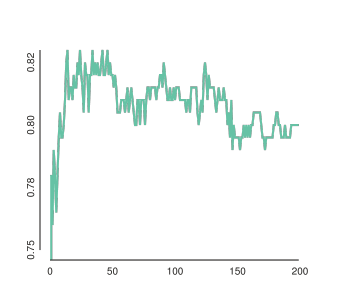

In [42]:
toyplot.plot(cvs, height=300, width=350, ymin=0.75);

In [40]:
# the best hyperparameter
cvs.argmax()

14

### Using best fit model
This looks a lot better than the one above, and scores higher too. 

score: 0.83


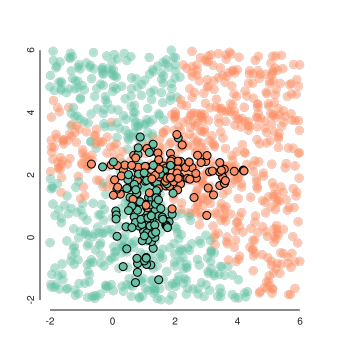

In [43]:
# train the new model on the best cross-val hyperparameter
knn = KNeighborsClassifier(n_neighbors=cvs.argmax())
knn.fit(Xtrain, ytrain)
yfit = knn.predict(Xtest)
print("score:", np.mean(yfit == ytest))

# plot predictions as background color
c, a, m = toyplot.scatterplot(
    newdata[:, 0],
    newdata[:, 1],
    color=[toyplot.color.Palette()[i] for i in knn.predict(newdata)],
    size=8, 
    opacity=0.5,
    width=350, 
    height=350,
);

# plot test data (not used in training) and show prediction
a.scatterplot(
    Xtest[:, 0], Xtest[:, 1], size=8, 
    mstyle={"stroke": 'black'},
    color=[toyplot.color.Palette()[i] for i in ytest],
);